# **Traffic Sign Recognition** 

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

In this post, we will go over the work I did for project 2 of Udacity’s self-driving car project, classifying German traffic signs using deep learning. It is very important for a self-driving car to read traffic signs and interpret them to understand the traffic rules. Deep learning neural networks or convolutional neural networks have emerged as powerful image classifiers in the past decade. In this project we will go over the solution for classifying German sign data that gave accuracy of 95.1 on the test data. Here is a link to my [project code](https://github.com/nandi-abhishek/Udacity-CarND-Traffic-Sign/blob/master/Traffic_Sign_Classifier.ipynb)



### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the Numpy library to calculate summary statistics of the German traffic signs data set:

The size of training set is 34799.  
The size of the validation set is 4410.  
The size of test set is 12630.  
The shape of a traffic sign image is (32, 32, 3).  
The number of unique classes/labels in the data set is 43.  

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data. It shows that not all classes has large number of samples. Some has around 2000 samples whereas some labels has around 200 examples ...

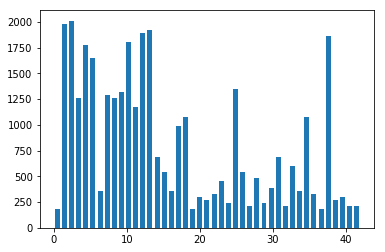

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I converted the images to grayscale because grayscaling removes clutter from an image. Since the problem includes only classifying images, grayscaling allows the feature maps to concentrate only on the subject under interest. Also, grayscaling converts a 3-channel RGB image to a single channel image which reduces the computation complexity. Grayscaling was achieved by using the OpenCV's cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).

Here is an example of a traffic sign image before and after grayscaling.

 Original Image  | Gray Scale Image
  ------------- | -------------
 ![Color50.png](attachment:Color50.png "Original Image")   |   ![Gray50.png](attachment:Gray50.png "Grayscale Image")
  
As the next step, I normalized the image data to the range (-1,1). This was done using the line of code X_train_norm = (X_train - 128.0)/128. This step is necessary because normalization helps in making the neural network converge faster since the variation in data is restricted within a specific range. 

#### Data Augmentation ####

A big limitation of deep neural networks is that they may have millions of parameters, tuning which requires a vast data set. This however is not always possible. In such cases, data augmentation helps us generate additional training examples. I have generated additional data samples by applying affine transformation to the image. Affine transformations refer to transformations that do not alter the parallelism of lines. I have specifically used rotation, shearing and translation to simulate the effect of viewing the sign from different angles and different distances. 

To generate the augmented data I have taken help from:

[Geometric Transformations of Images](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)

Here are some examples of original image and augmented image:

Original Image  | Transformed Image
  ------------- | -------------
 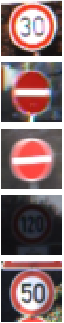   |   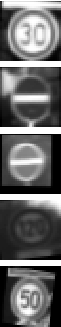

The total data agmentation step might take 4-5 hrs. The augmented data set and the histogram are given below ...

The size of training set is 104599.  
The size of the validation set is 4410.  
The size of test set is 12630.  
The shape of a traffic sign image is (32, 32, 1).  
The number of unique classes/labels in the data set is 43.  

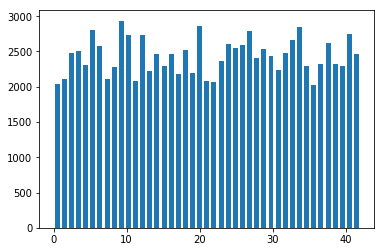
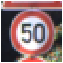
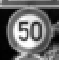


#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

I decided to use a deep neural network classifier as a model. Instead of using the original LeNet-5 architecture my model is adapted from Sermanet/LeCunn traffic sign classification journal article.


| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale Preproceesed Image   		| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					| Activation Function							|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16	|
| RELU					| Activation Function							|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16  		  		    |
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 1x1x400 	|
| Flattening		    | Flatten 1x1x400 and 5x5x16 layers. Output 800	|
| Dropout       		| Keep Probablity (0.5)							|
| Fully Connected		| Input 800, output 43							|
|						|												|
 
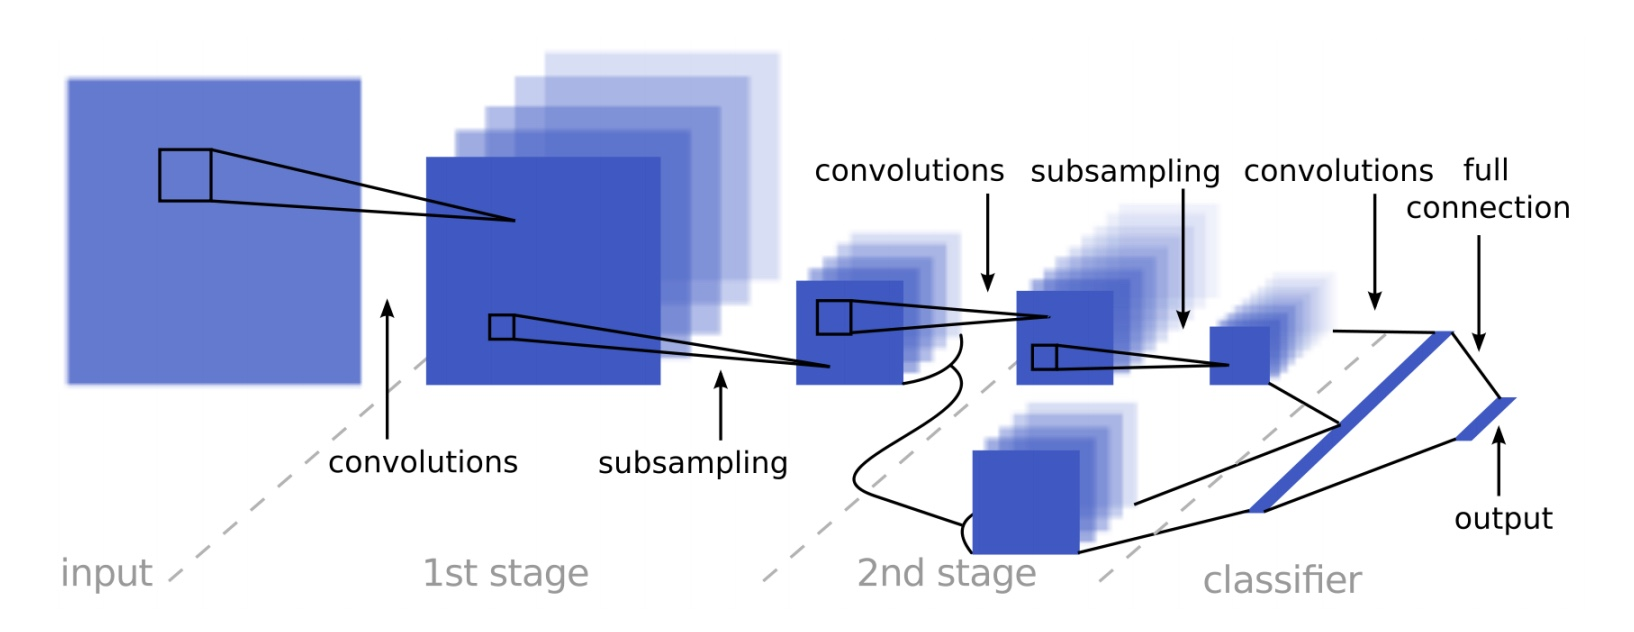

#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used the following parameters:  
optimizer: Adam  
batch size: 100  
number of epochs: 50  

The other hyperparameters apart from the Kernel size and stride used were:  
learning rate: 0.001  
mean (for weight initialization): 0  
stddev (for weight initialization): 0.1  

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:  

training set accuracy of 99.8%.  
validation set accuracy of 96.7%.  
test set accuracy of 94.8%.  

I chose an iterative approach to modify the Le-Net architecture to get the results:

* What was the first architecture that was tried and why was it chosen?  
I chose the LeNet-5 architecture as a starting point since it works well on hand-written digits. But, I was not getting good validation set accuracy even with tuning al the hyper parameters. Then I went through Sermanet/LeCunn traffic sign classification journal article and decided to try that

* What were some problems with the initial architecture?  
There was a lot of overfitting with the initial architecture after feeding the network with the pre-processed data. The training accuracy was about 98% and the validation set accuracy was about 91%.

* How was the architecture adjusted and why was it adjusted?  
To reduce overfitting, I first tried with L2 regularization. Then I used a dropout layers after before the fully connected layer which gave better result. I experimented with different values for the keep probability and 0.5 seemed to provide the best validation accuracy on my architecture. I have also tried with various amount of pre processed data. Finally, created around 3000 samples per class and got better validation accuracy.

* Which parameters were tuned? How were they adjusted and why?  
Learning Rate: Tried multiple learning rate 0.001, 0.0005, 0.0001. This was because I saw with increased number of epochs the train and validation accuracy were oscillating. So, I was trying with lower learning rate. But, finally didn't see much difference and chose 0.001.

    Dropout: I tried with some dropout percentages and saw 0.5 was reasonable.

    Epochs: I increased the number of epochs because the images were not as simple as handwritten digits with 10 classes. The traffic sign dataset contained 43 classes and the complexity of the images was also higher. To encode the information in this training set into the CNN required more nuber of epochs of training. 
    
    Batchsize: Tried multiple batch size like 100, 128, 256, 512 keeping other parameters same. I have observed better result with batch 100.

* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?  
    Convolution layers are useful if the data contains regional similarity i.e. the arrangement of data points gives us useful insight about the spatial information contained in the daata. Images particularly contain useful spatial information which is an important feature. Convolution layers help in extracting these features.

    Dropout turns off or sets the activation in some of the neurons in a layer to 0 randomly. This helps the network learn only the most important features in the images ignoring very minute details which might be noise and may change from image to image even belonging to the same class. This prevents the network from overfitting to the training data. It increases the accuracy on the validation set and hence the testing set. So, the network performs better on new images.

    Augmenting the database with modified images helped a lot. Initially the netwrok was overfitting a lot. Dropout helped but more than that large amount of augmented images increased validation accuray and reduced overfitting.



### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are some of the German traffic signs that I found on the web:

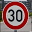
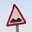
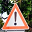
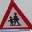
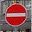
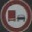
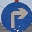
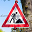
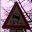
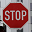

In general the images acquired from the web have a higher resolution than the images in the training dataset. These images have a lot of objects apart from just traffic signs. Since, my model does not work on newly seen images, I manually cropped the images so that it only contained the traffic sign. Furthermore, my model only accepts inputs with an aspect ratio of 1:1 and of size 32x32. Hence, I resized them in order to fit them into my model which lead to a loss of detail in the images. These were a few issues that I encountered during data pre-processing.

Most of the images in my opinion are clear but the oone with slippery road sign is really difficult to identify.


#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 30 km/h       		| 30 km/h   									| 
| Bumpy Road	        | Bumpy Road 		                 			|
| General Caution		| General Caution								|
| Children crossing		| Pedestrian  				 				    |
| No Entry  			| No Entry         							    |
| No passing for vehicles over 3.5 metric tons  | No passing for vehicles over 3.5 metric tons ||
| Turn right ahead  			| Turn right ahead         							    |
| Road work 			| Road work         							    |
| Slippery road  			| Slippery road       							    |
| Stop 			| Stop       							    |


The model was able to correctly guess 9 of these 10 traffic signs, which gives an accuracy of 90% which is almost close to the test accuracy. The one that it missed is 'Children Crossing' and predicted 'Pedestrian'. Those two images have similarites to some extent.

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The following two images shows the top probablities for each image detected by the model.

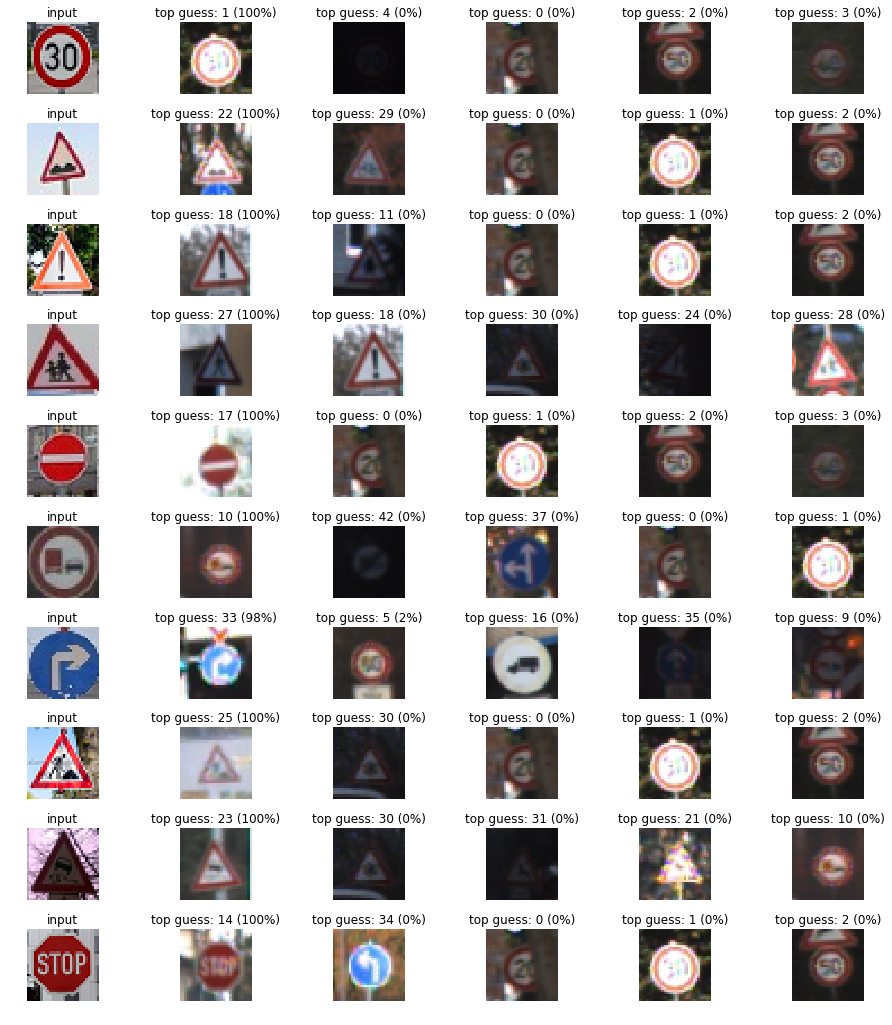
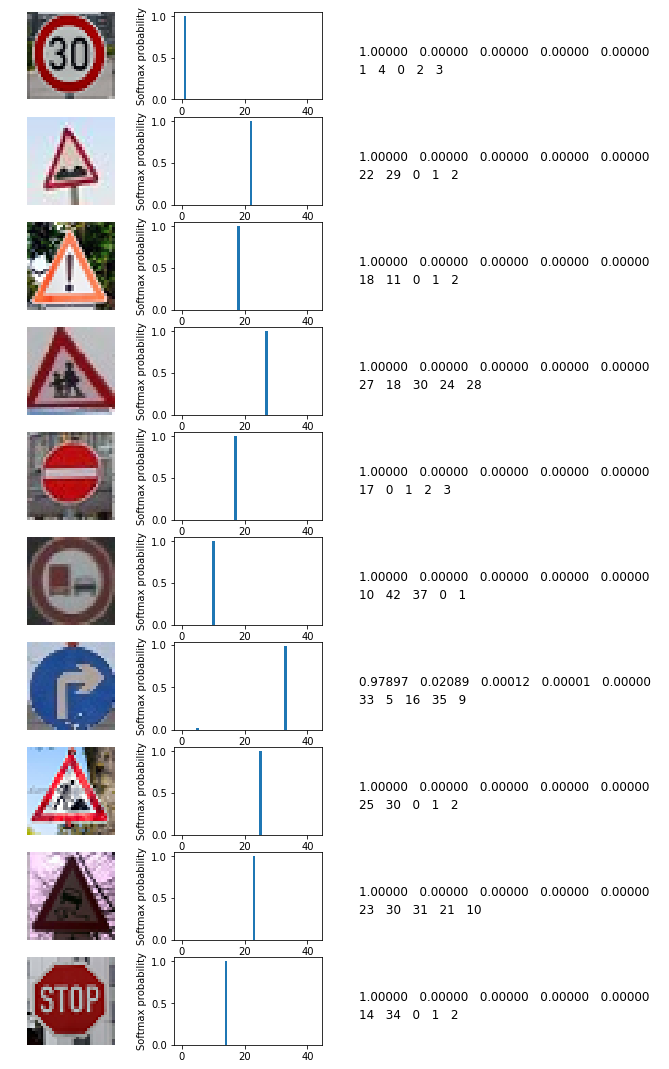

Except that one wrong identified image the model is performing well. In most cases it is 100% sure about its prediction too.

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?


